# Repracticing Simple <font color='blue'><b>Linear Regression : Bikeshare.csv</b></font>

## 1. Reading & Cleaning the Bikeshare Dataset

In [1]:
# reading bikeshare data and setting 'datetime' as index
import numpy as np
import pandas as pd
url = 'https://raw.githubusercontent.com/upxacademy/ML_with_Python/master/Datasets/bikeshare.csv?token=AYxzdiGnjM610dBT7PuwUnUNOmm3bGcvks5ZFDyLwA%3D%3D'
bikesData = pd.read_csv(url, index_col='datetime', parse_dates=True)
bikesData.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


<font color='blue'><b>This OBJECT i.e. "bikesData" is itself a <u>PANDA DataFrame</u>.</b> </font> 

Let us know the **DataType of all Columns here**

In [2]:
print(type(bikesData))
print(bikesData.dtypes)

<class 'pandas.core.frame.DataFrame'>
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object


<font color='blue'><b>O/P variable here i.e. "count" is creating confusion since it is a method in Python, so will RENAME it with some other name using <u>RENAME fucntion</u></b> </font>

In [3]:
# O/P variable here i.e. "count" is creating confusion since it is a method in Python, so will change it with some other name
bikesData.rename(columns={"count":"total"}, inplace=True)
bikesData.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


<font color='blue'> <b> Round Off to 3 decimal places applied on DESCRIBE function </b> </font>

In [4]:
np.round(bikesData.describe(),3)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total
count,10886.000,10886.000,10886.000,10886.000,10886.000,10886.000,10886.000,10886.000,10886.000,10886.000,10886.000
mean,2.507,0.029,0.681,1.418,20.231,23.655,61.886,12.799,36.022,155.552,191.574
std,1.116,0.167,0.466,0.634,7.792,8.475,19.245,8.165,49.960,151.039,181.144
min,1.000,0.000,0.000,1.000,0.820,0.760,0.000,0.000,0.000,0.000,1.000
25%,2.000,0.000,0.000,1.000,13.940,16.665,47.000,7.002,4.000,36.000,42.000
50%,3.000,0.000,1.000,1.000,20.500,24.240,62.000,12.998,17.000,118.000,145.000
75%,4.000,0.000,1.000,2.000,26.240,31.060,77.000,16.998,49.000,222.000,284.000
max,4.000,1.000,1.000,4.000,41.000,45.455,100.000,56.997,367.000,886.000,977.000


**From above DESCRIBE, we can find that <font color='blue'><b> 'temp', 'atemp' & 'humidity' are almost <u> NORMALLY DISTRIBUTED since MEAN & MEDIAN is almost same</u></b> </font> while <font color='red'><b> 'casual' & 'registered' is <u> RIGHT SKEWED since MEAN is > than MEDIAN </u> due to outliers at right side</font>.**

This gives basic understanding of distribution about few IMP Input Variables

<b>---------------------------------------------------------------------</b>

**<u>Moving all Column Names</u> for this bikesData into an Object which is an INDEX**

In [5]:
# Moving all Column Names for this bikesData into an Object which is an INDEX
allCols = bikesData.columns
print(allCols)
print(type(allCols))
print(allCols[5:9]) # Getting 6th Input Variable in this Obejct i.e. "atemp" till next 4 entries

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'total'],
      dtype='object')
<class 'pandas.core.indexes.base.Index'>
Index(['atemp', 'humidity', 'windspeed', 'casual'], dtype='object')


<font color='blue'><b><u>Slice & Dice</u></b></font>

**Directly from bikesData**

In [6]:
bikesData.temp[2:5]

datetime
2011-01-01 02:00:00    9.02
2011-01-01 03:00:00    9.84
2011-01-01 04:00:00    9.84
Name: temp, dtype: float64

**Using iloc**

In [7]:
#Using iloc
print(allCols)
bikesData.iloc[2:5,4:10]

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'total'],
      dtype='object')


,temp,atemp,humidity,windspeed,casual,registered
datetime,,,,,,
2011-01-01 02:00:00,9.02,13.635,80,0.0,5,27
2011-01-01 03:00:00,9.84,14.395,75,0.0,3,10
2011-01-01 04:00:00,9.84,14.395,75,0.0,0,1


**Using loc**

In [8]:
#Using loc
#bikesData.loc[2:5,"temp":"atemp"]
#Above LOC is giving ERROR since 2:5 as number is not woorking to get selective rows due to DATETIME as Index

#Below without passing any INTEGER is OK
#bikesData.loc[:,"temp":"atemp"]

**Fetching bikesData  via allCols**

In [9]:
#bikesData[allCols[4:7]] # Getting all records for 5th Input Variable till next 3 entries

In [10]:
np.round(bikesData.describe(),3)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total
count,10886.000,10886.000,10886.000,10886.000,10886.000,10886.000,10886.000,10886.000,10886.000,10886.000,10886.000
mean,2.507,0.029,0.681,1.418,20.231,23.655,61.886,12.799,36.022,155.552,191.574
std,1.116,0.167,0.466,0.634,7.792,8.475,19.245,8.165,49.960,151.039,181.144
min,1.000,0.000,0.000,1.000,0.820,0.760,0.000,0.000,0.000,0.000,1.000
25%,2.000,0.000,0.000,1.000,13.940,16.665,47.000,7.002,4.000,36.000,42.000
50%,3.000,0.000,1.000,1.000,20.500,24.240,62.000,12.998,17.000,118.000,145.000
75%,4.000,0.000,1.000,2.000,26.240,31.060,77.000,16.998,49.000,222.000,284.000
max,4.000,1.000,1.000,4.000,41.000,45.455,100.000,56.997,367.000,886.000,977.000


**Trying <u>np.PERCENTILE</u> function to get all values as we see from DESCRIBE**

In [11]:
np.percentile(bikesData[allCols[4]], [0,25,50,75,100]) #Getting percentile details for 5th Column i.e. "temp"

array([ 0.82, 13.94, 20.5 , 26.24, 41.  ])

<font color='blue'><b> Below Code helps to not let type PRINT always </b> </font>

In [12]:
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = all

In [13]:
print("Dimension is:",np.ndim(bikesData))
print("Shape i.e. Rows and Column here is:",np.shape(bikesData))
print("Size is:",np.size(bikesData))
bikesData.shape

Dimension is: 2
Shape i.e. Rows and Column here is: (10886, 11)
Size is: 119746


(10886, 11)

## 2. Visualizing the data

In [14]:
import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams['font.size'] = 14

**As below <u>'allCols'</u> is <font color='blue'><b>1D Array with 11 components which are 11 COLUMN-NAMES from bikesData</b></font>**

In [15]:
print(allCols.shape, allCols.size, allCols.ndim)
allCols.shape[0]-1

(11,) 11 1


10

<font color='blue'><b>Line Plot</b></font> to plot basis Time-Line

** Of all I/P Variables w.r.t. Index i.e. Daytime**

For I/P Variable :  " season "


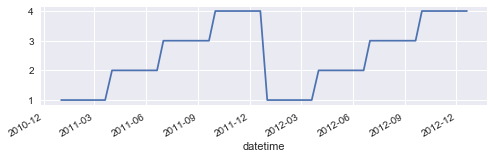

For I/P Variable :  " holiday "


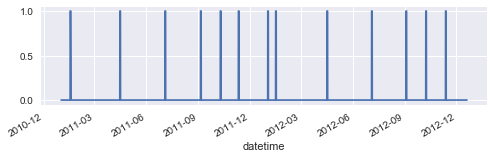

For I/P Variable :  " workingday "


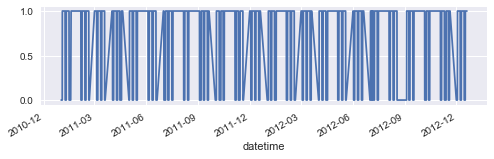

For I/P Variable :  " weather "


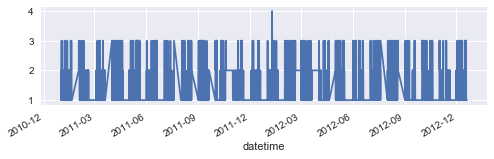

For I/P Variable :  " temp "


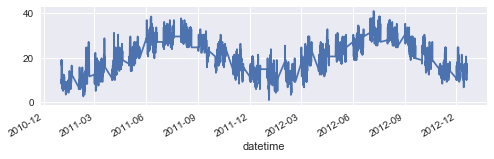

For I/P Variable :  " atemp "


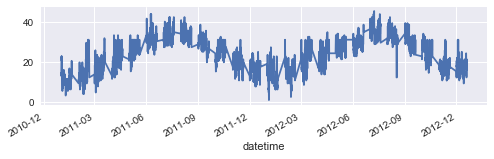

For I/P Variable :  " humidity "


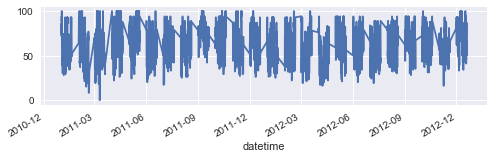

For I/P Variable :  " windspeed "


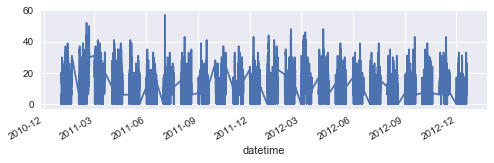

For I/P Variable :  " casual "


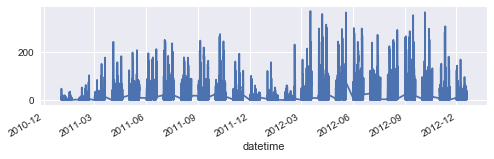

For I/P Variable :  " registered "


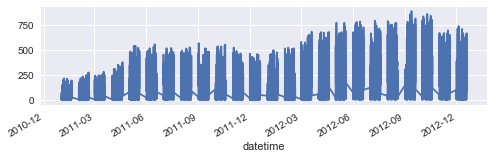

For I/P Variable :  " total "


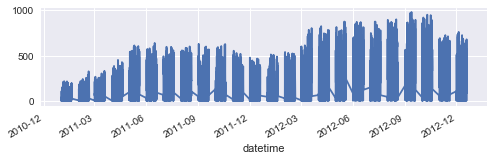

In [22]:
for i in range (0, allCols.size):
    plt.figure(figsize=(8,2))
    bikesData[allCols[i]].plot()
    print("For I/P Variable : ",'"',allCols[i],'"')
    #plt.ylabel = allCols[i]
    plt.show()
#bikesData.season.plot()

<font color='blue'><b>Unvariate Analysis<b></font>

**Using FOR with allCols and bikesData**

Using ** Seaborn DISTPLOT** for all Input Variables & Output Variable as well

C:\Users\Nivedit\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


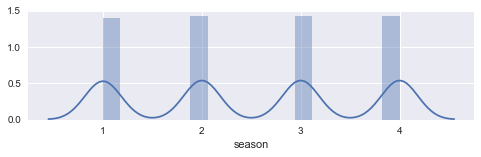

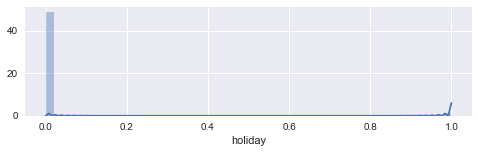

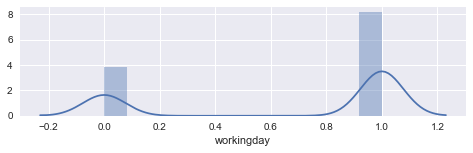

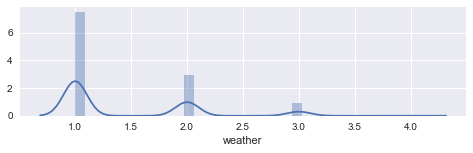

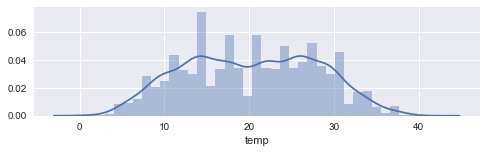

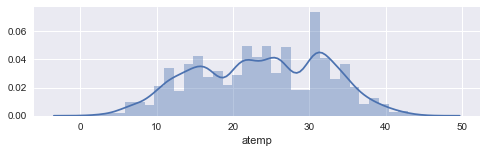

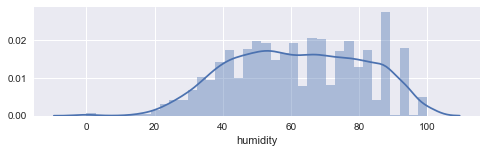

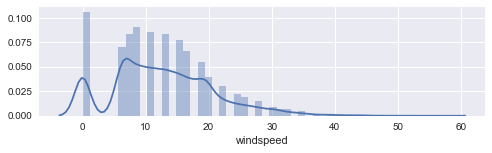

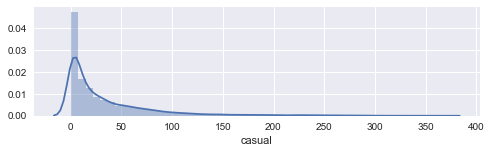

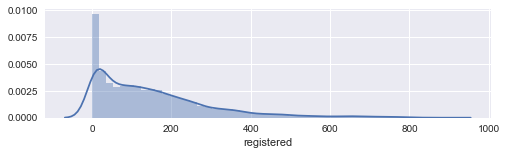

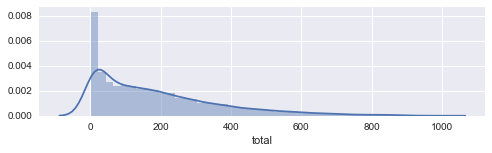

In [25]:
#Using DISTPLOT to get DISTRIBUTION
i = 0
for i in range (0, allCols.shape[0]):
    plt.figure(figsize=(8,2))
    sns.distplot(bikesData[allCols[i]])
    plt.xlabel = allCols[i]
    plt.show()

Using **BOXPLOT** for all Input Variables

C:\Users\Nivedit\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


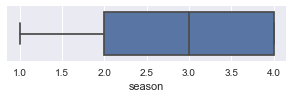

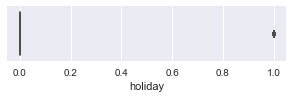

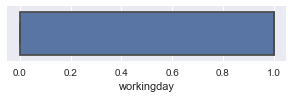

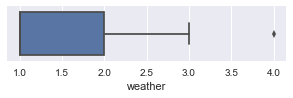

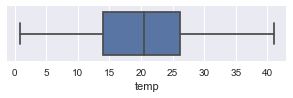

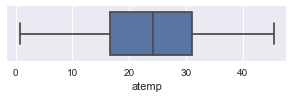

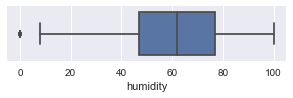

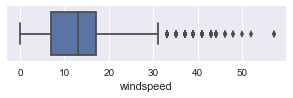

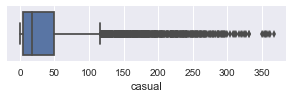

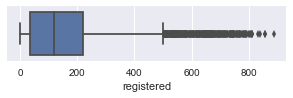

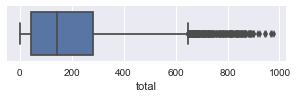

In [20]:
# Using BOXPLOT to get Spread of Data with OUTLIERS
i = 0

for i in range (0, allCols.shape[0]):
    plt.figure(figsize=(5,1))
    sns.boxplot(x=allCols[i], data= bikesData)
    plt.xlabel = allCols[i]
    plt.show()

<font color='blue'><b>'Bivariate Analysis'<b></font> 

**Using FOR loop with allCols and bikesData**

Comparing each Input Variable with COUNT as Output Variable

C:\Users\Nivedit\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


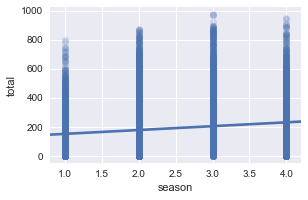

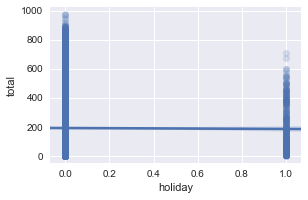

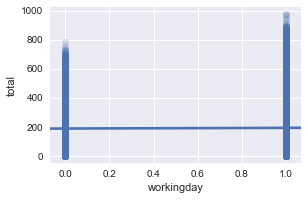

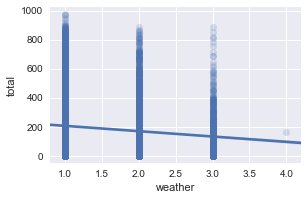

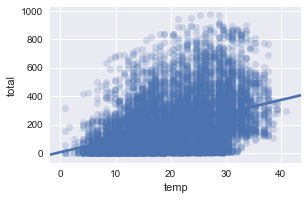

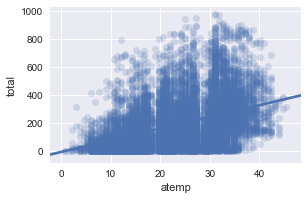

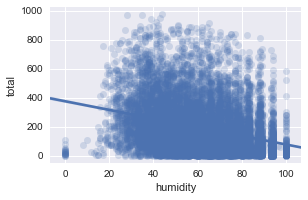

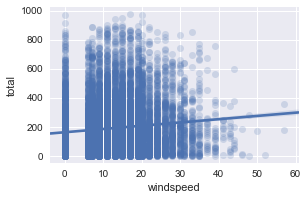

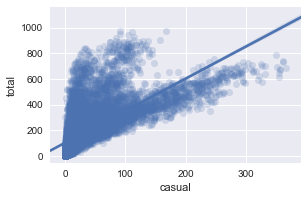

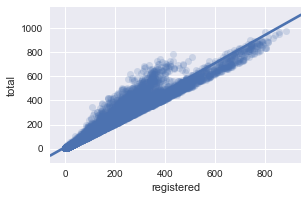

In [32]:
#This is simple to get SCATTER PLOT with Regression Line using LMPLOT() from Seaborn
#We used FOR loop ran over bikesData with allCols
for i in range (0, allCols.shape[0]-1):
    plt.figure(figsize=(3,1))
    sns.lmplot(x=allCols[i], y="total", data=bikesData, aspect=1.5, scatter_kws={'alpha':0.2}, size=3)
    plt.show

C:\Users\Nivedit\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


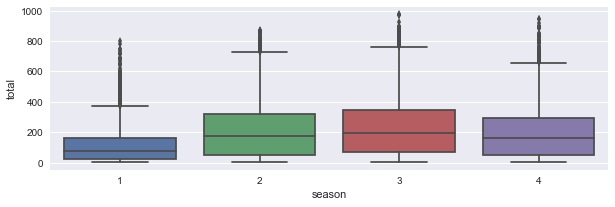

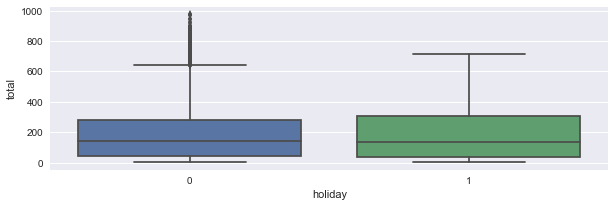

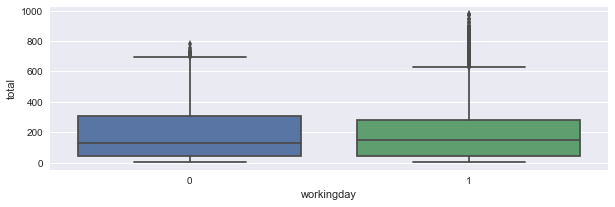

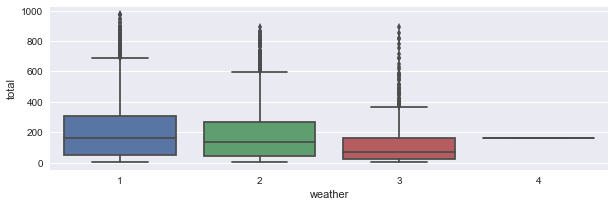

In [31]:
# Getting BOXPLOT to know the spread of each value in Input Variable across COUNT/TOTAL
for i in range (0, allCols.shape[0]-1):
    # Only for variables like : Season, holiday, workingday & weather (remaining I/P variables does not have classification
    if i < 4:
        plt.figure(figsize=(10,3))
        sns.boxplot(x=allCols[i], y="total", data=bikesData)
        plt.show()

<font color='blue'><b>'Corelation Matrix'<b></font> 

**Using HEATMAP to understand Corelation within Variables**

In [27]:
bikesData_corel = bikesData.corr()
bikesData_corel

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


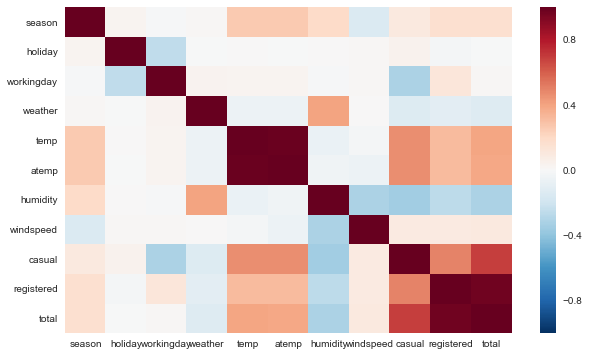

In [28]:
# Using Heatmap
sns.heatmap(bikesData_corel, 
            xticklabels=bikesData_corel.columns.values, 
            yticklabels=bikesData_corel.columns.values)

## 3. Forming Simple Linear Regression Model with just 2 Variables

**Building X and Y**

In [4]:
feature_cols = [allCols[4]] # allCols[4] is 'temp'
# this is same as <<  feature_cols = bikesData.temp
xJust2Var = bikesData[feature_cols]
yJust2Var = bikesData.total
xJust2Var.head()

,temp
datetime,
2011-01-01 00:00:00,9.84
2011-01-01 01:00:00,9.02
2011-01-01 02:00:00,9.02
2011-01-01 03:00:00,9.84
2011-01-01 04:00:00,9.84


**Import**

In [29]:
from sklearn.linear_model import LinearRegression

**Instantiate**

In [30]:
linReg = LinearRegression()

**Fit**

In [31]:
Just2Var_Fit = linReg.fit(xJust2Var,yJust2Var)

**Finding Intercept & Slope/Co-efficient**

In [32]:
Just2Var_Intercept = Just2Var_Fit.intercept_
Just2Var_Coeff = Just2Var_Fit.coef_
print("Intercept is:",Just2Var_Intercept)
print("Slope/Co-efficient is:", Just2Var_Coeff)

Intercept is: 6.04621295962
Slope/Co-efficient is: [ 9.17054048]


**Score**

In [9]:
print('Score of the model is:',Just2Var_Fit.score(xJust2Var, yJust2Var))

Score of the model is: 0.155593678028


**Predict**

In [33]:
#Predicting COUNT whenn TEMP = 25 Degree Celcius
Just2Var_Predict = Just2Var_Fit.predict(25)
Just2Var_Predict

array([ 235.309725])

In [12]:
#Manual Predict
Just2Var_Manual_Predict = 25 * Just2Var_Coeff + Just2Var_Intercept
Just2Var_Manual_Predict

array([ 235.309725])

In [35]:
y_pred = linReg.predict(xJust2Var)

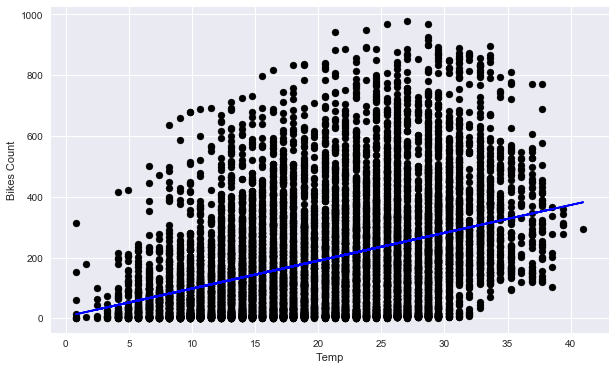

In [37]:
plt.scatter(xJust2Var,yJust2Var, color = 'black')
plt.plot(xJust2Var, y_pred, color = 'blue')

plt.xticks()
plt.yticks()

plt.xlabel('Temp')
plt.ylabel('Bikes Count')

plt.show()

## 4. Adding more features to the model

In [38]:
allCols

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'total'],
      dtype='object')

**Building X with more I/P Variables**

In [39]:
feature_cols = [allCols[0], allCols[3], allCols[4], allCols[6]]
feature_cols

['season', 'weather', 'temp', 'humidity']

In [40]:
xMoreVar = bikesData[feature_cols]
xMoreVar.head()

,season,weather,temp,humidity
datetime,,,,
2011-01-01 00:00:00,1,1,9.84,81
2011-01-01 01:00:00,1,1,9.02,80
2011-01-01 02:00:00,1,1,9.02,80
2011-01-01 03:00:00,1,1,9.84,75
2011-01-01 04:00:00,1,1,9.84,75


**Building Y**

In [63]:
Y = bikesData.total

**Fit**

In [46]:
MoreVar_Fit = linReg.fit(xMoreVar,Y)

**Intercept & Slope/Co-efficient**

In [47]:
MoreVar_Intercept = MoreVar_Fit.intercept_
print("Intercept is:", MoreVar_Intercept)

Intercept is: 159.520687861


**Score**

In [48]:
print("Score :", MoreVar_Fit.score(xMoreVar, Y))

Score : 0.258297583273


In [49]:
MoreVar_Coeff = MoreVar_Fit.coef_
print("Slope / Co-efficient is:", MoreVar_Coeff)
# Coefficient here is NUMPY NDARRAY type
print("Type of this Co-efficient is:",type(MoreVar_Coeff))

Slope / Co-efficient is: [ 22.53875753   6.67030204   7.86482499  -3.11887338]
Type of this Co-efficient is: <class 'numpy.ndarray'>


<font color='blue'><b>Coefficient here is <u>NUMPY NDARRAY</u> type</b></font>

In [50]:
#MoreVar_Coeff[0:4]
MoreVar_Coeff.shape[0]

4

**Predict**

What is **TOTAL/COUNT** when <font color='blue'><b>season = 2, weather = 1, temp = 25 degree celcius, humidity = 60</b></font>

In [51]:
MoreVar_Predict = MoreVar_Fit.predict([(2,1,25,60)])

MoreVar_Predict

# linReg.predict([2,2,25,60])   -->> This will give error since values are to be passed as array : [(2,2,25,60)]

array([ 220.75672683])

When all I/P Var is 0, the predict should give same as Intercept

In [52]:
# When all I/P Var is 0, the predict should give same as Intercept

MoreVar_Fit.predict([(0,0,0,0)])

array([ 159.52068786])

In [53]:
MoreVar_Intercept

159.52068786129843

In [54]:
y_pred = linReg.predict(xMoreVar)

<font color='blue'><b>Manual Predict</b></font>


**1 Way**:

In [25]:
#to pass values as season = 2, weather = 1, temp = 25 degree celcius, humidity = 60

MoreVar_Coeff[0]*2 + MoreVar_Coeff[1]*1 + MoreVar_Coeff[2]*25 + MoreVar_Coeff[3]*60 + MoreVar_Intercept

220.75672683030126

**2nd Way**:

In [26]:
#to pass Input Values in Array and via For Loop get this sum finally to get MANUAL Count Value
z = [2,1,25,60]  # season = 2, weather = 1, temp = 25 degree celcius, humidity = 60
i = 0
sum1 = 0
sum2 = 0
for i in range (0, MoreVar_Coeff.shape[i]):
    sum1 = z[i] * MoreVar_Coeff[i]
    sum2 = sum2 + sum1
print("Net Sum excluding Intercept here:",sum2)

Net Sum excluding Intercept here: 61.236038969


In [27]:
#Final COUNT/TOTAL Value when we add this to Intercept

MoreVar_Manual_Predict = sum2 + MoreVar_Intercept

print('"',MoreVar_Manual_Predict,'"',": It is same as what we got from PREDICT Method of LIN-REGRESSION i.e.",MoreVar_Predict)

" 220.75672683 " : It is same as what we got from PREDICT Method of LIN-REGRESSION i.e. [ 220.75672683]


**Pair the Feature Names with thier Co-efficients in a list using ZIP**

In [28]:
MoreVar_zip_Coeff = list(zip(feature_cols, MoreVar_Coeff))
MoreVar_zip_Coeff

[('season', 22.538757532466722),
 ('weather', 6.6703020359237817),
 ('temp', 7.8648249924774278),
 ('humidity', -3.1188733823965014)]

## 5. Train-Test-Split / RMSE

In [17]:
from sklearn import metrics

In [18]:
from sklearn.model_selection import train_test_split

In [21]:
def train_test_RMSE (feature_cols):
    
    # Building X & Y
    X = bikesData[feature_cols]
    Y = bikesData.total
    
    # Calling train_test_split function
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state = 123)
    
    # Instantiate
    linReg = LinearRegression()
    
    # Fit TRAIN data
    linReg.fit(X_train, Y_train)
    
    # Predict TEST data
    Y_pred = linReg.predict(X_test)
    
    # Return RMSE of this Y-Predicted values and Y-Test data points
    return(linReg.score(Y,Y), np.sqrt(metrics.mean_squared_error(Y_pred, Y_test)))

In [22]:
print('Score & RMSE for feature set 1:',train_test_RMSE(['season', 'temp']))
print('Score & RMSE for feature set 2:',train_test_RMSE(['season', 'temp', 'atemp']))
print('Score & RMSE for feature set 3:',train_test_RMSE(['season', 'temp', 'weather']))
print('Score & RMSE for feature set 4:',train_test_RMSE(['season', 'temp', 'humidity']))
print('Score & RMSE for feature set 5:',train_test_RMSE(['season', 'temp','weather','humidity']))

Score & RMSE for feature set 1: (0.15957394871477926, 165.91595906719945)
Score & RMSE for feature set 2: (0.1595788720739254, 165.92577879535784)
Score & RMSE for feature set 3: (0.17129568255692584, 164.16539976291821)
Score & RMSE for feature set 4: (0.25777080046885226, 155.59818936691417)
Score & RMSE for feature set 5: (0.2581894783035813, 155.64945913079674)
